--- Part 1: Building a Simple Feedforward Neural Network ---

Original FNN training data shape: (60000, 28, 28)
Original FNN test data shape: (10000, 28, 28)
Flattened and Normalized FNN training data shape: (60000, 784)
Flattened and Normalized FNN test data shape: (10000, 784)

--- FNN Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Training FNN Model ---

--- Evaluating FNN Model on Test Data ---
FNN Test Loss: 0.3547
FNN Test Accuracy: 0.8742

--- FNN Classification Report ---
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      1000
           1       0.97      0.97      0.97      1000
           2       0.81      0.71      0.76      1000
           3       0.91      0.85      0.88      1000
           4       0.69      0.90      0.78      1000
           5       0.97      0.95      0.96      1000
           6       0.77      0.58      0.66      1000
           7       0.93      0.96      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000


--- FNN Confusion Matrix ---


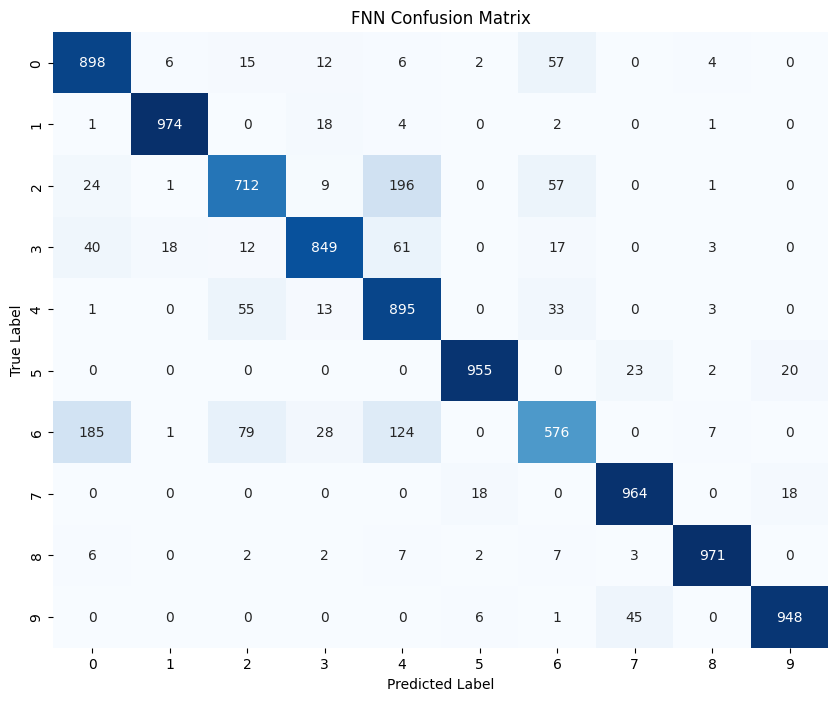

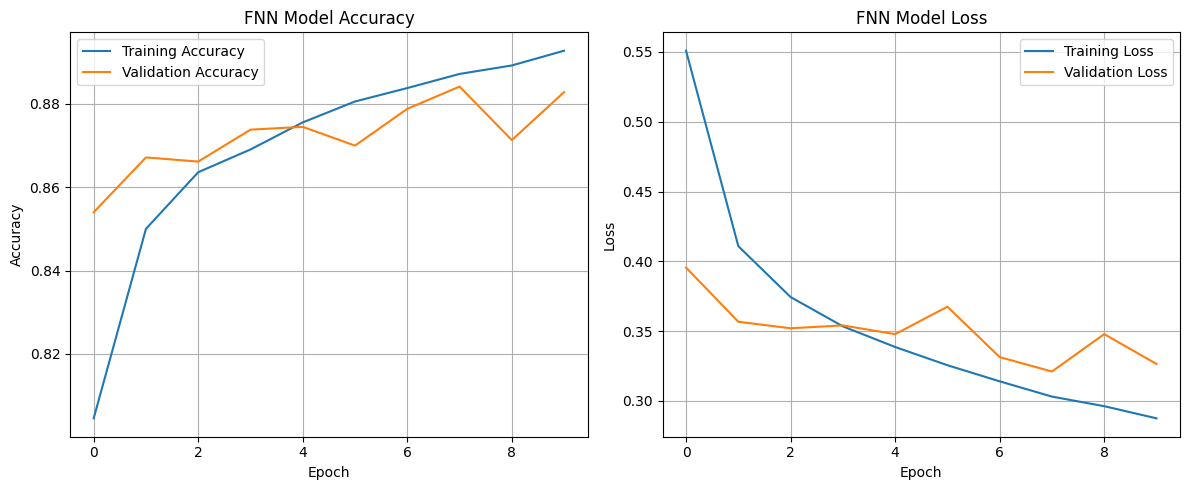


--- Part 2: Implementing a Convolutional Neural Network (CNN) ---

Original CNN training data shape: (60000, 28, 28)
Original CNN test data shape: (10000, 28, 28)
Reshaped and Normalized CNN training data shape: (60000, 28, 28, 1)
Reshaped and Normalized CNN test data shape: (10000, 28, 28, 1)

--- CNN Model Summary ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Training CNN Model ---

--- Evaluating CNN Model on Test Data ---
CNN Test Loss: 0.0321
CNN Test Accuracy: 0.9894

--- CNN Classification Report ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


--- CNN Confusion Matrix ---


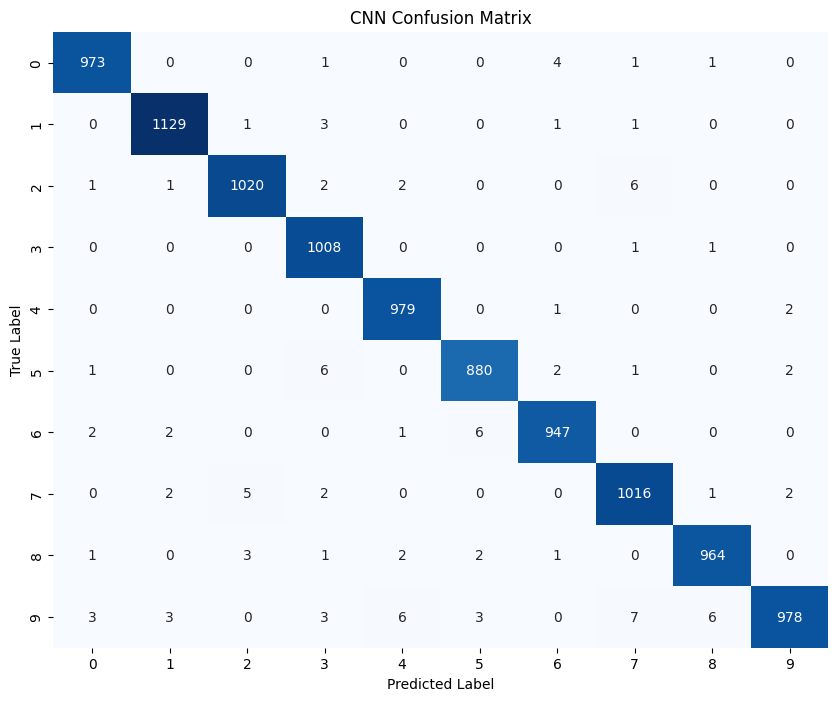

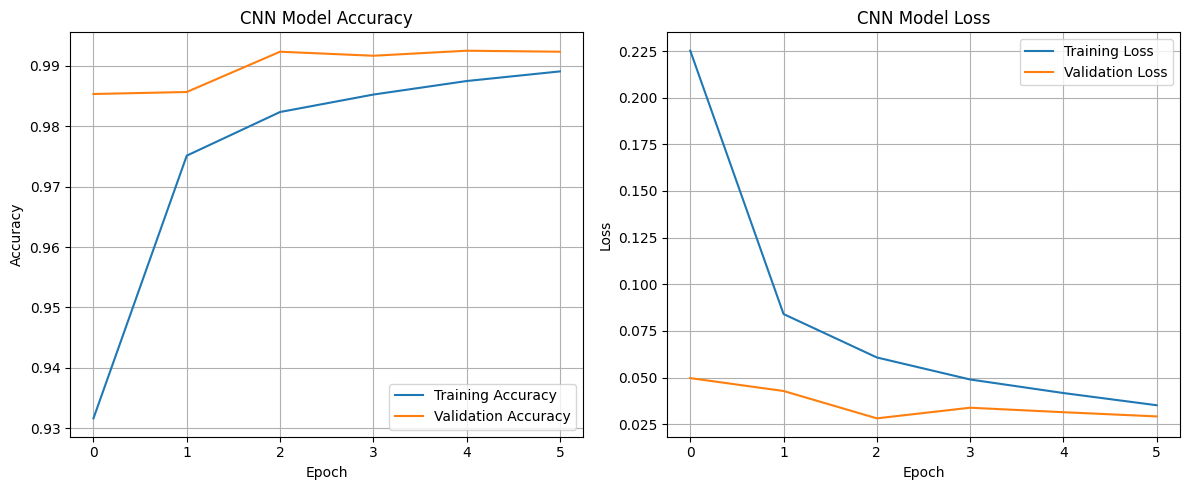


--- Sample CNN Predictions ---


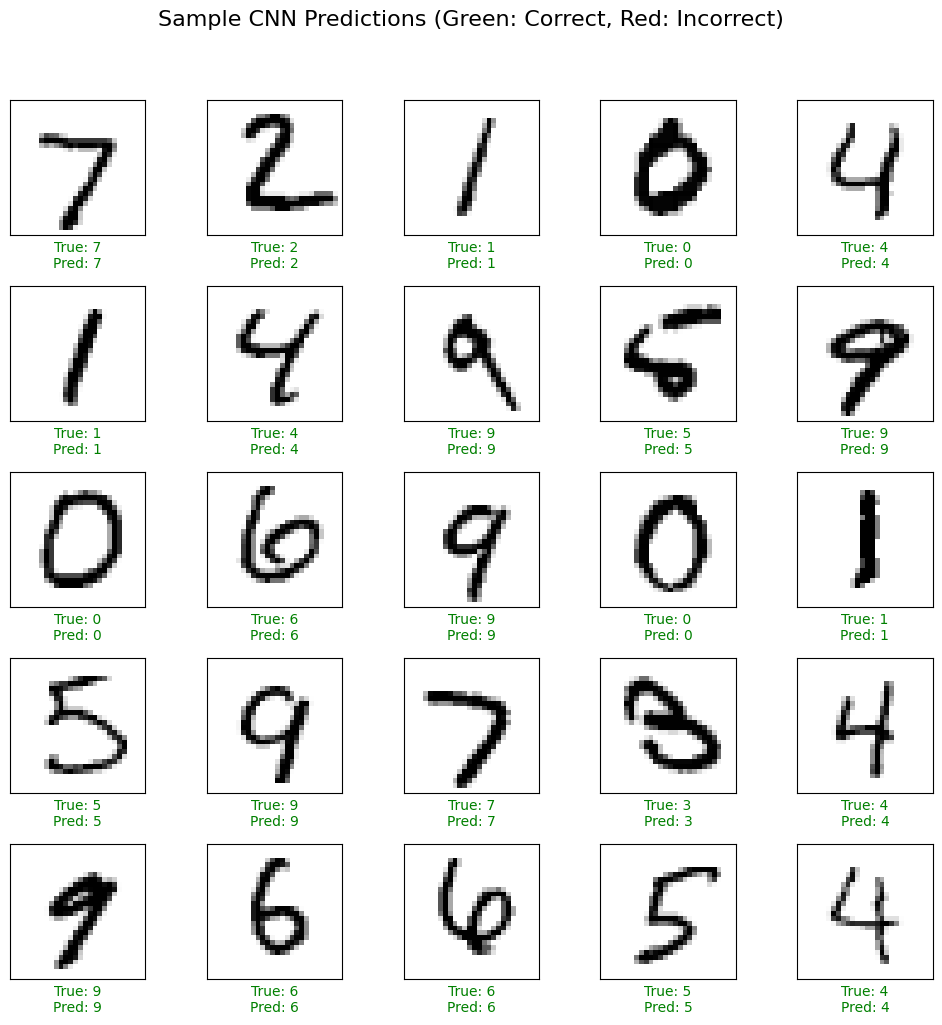

In [ ]:
k+import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, fashion_mnist
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Suppress TensorFlow warnings for cleaner output
tf.keras.utils.disable_interactive_logging()

# --- Part 1: Building a Simple Feedforward Neural Network (FNN) on Fashion MNIST ---

print("--- Part 1: Building a Simple Feedforward Neural Network ---")

# Load and preprocess Fashion MNIST
(x_train_fnn, y_train_fnn), (x_test_fnn, y_test_fnn) = fashion_mnist.load_data()
print(f"\nOriginal FNN training data shape: {x_train_fnn.shape}")
print(f"Original FNN test data shape: {x_test_fnn.shape}")

# Flatten and normalize
x_train_fnn_flat = x_train_fnn.reshape(-1, 28 * 28) / 255.0
x_test_fnn_flat = x_test_fnn.reshape(-1, 28 * 28) / 255.0

print(f"Flattened and Normalized FNN training data shape: {x_train_fnn_flat.shape}")
print(f"Flattened and Normalized FNN test data shape: {x_test_fnn_flat.shape}")

# Build model
model_fnn = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_fnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("\n--- FNN Model Summary ---")
model_fnn.summary()

# Early stopping to prevent overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
print("\n--- Training FNN Model ---")
history_fnn = model_fnn.fit(x_train_fnn_flat, y_train_fnn,
                            epochs=10,
                            validation_split=0.1,
                            callbacks=[early_stop],
                            verbose=1)

# Evaluate model
print("\n--- Evaluating FNN Model on Test Data ---")
loss_fnn, accuracy_fnn = model_fnn.evaluate(x_test_fnn_flat, y_test_fnn, verbose=0)
print(f"FNN Test Loss: {loss_fnn:.4f}")
print(f"FNN Test Accuracy: {accuracy_fnn:.4f}")

# Predictions and reports
y_pred_fnn = np.argmax(model_fnn.predict(x_test_fnn_flat), axis=-1)
print("\n--- FNN Classification Report ---")
print(classification_report(y_test_fnn, y_pred_fnn))

print("\n--- FNN Confusion Matrix ---")
cm_fnn = confusion_matrix(y_test_fnn, y_pred_fnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("FNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_fnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_fnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('FNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_fnn.history['loss'], label='Training Loss')
plt.plot(history_fnn.history['val_loss'], label='Validation Loss')
plt.title('FNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Part 2: Implementing a CNN on MNIST ---

print("\n--- Part 2: Implementing a Convolutional Neural Network (CNN) ---")

# Load and preprocess MNIST
(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = mnist.load_data()
print(f"\nOriginal CNN training data shape: {x_train_cnn.shape}")
print(f"Original CNN test data shape: {x_test_cnn.shape}")

# Reshape and normalize
x_train_cnn = x_train_cnn.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_cnn = x_test_cnn.reshape(-1, 28, 28, 1).astype('float32') / 255.0

print(f"Reshaped and Normalized CNN training data shape: {x_train_cnn.shape}")
print(f"Reshaped and Normalized CNN test data shape: {x_test_cnn.shape}")

num_classes_cnn = 10

# Build CNN model
model_cnn = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes_cnn, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("\n--- CNN Model Summary ---")
model_cnn.summary()

# Early stopping
early_stop_cnn = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train CNN
print("\n--- Training CNN Model ---")
history_cnn = model_cnn.fit(x_train_cnn, y_train_cnn,
                            epochs=10,
                            validation_split=0.1,
                            callbacks=[early_stop_cnn],
                            verbose=1)

# Evaluate CNN
print("\n--- Evaluating CNN Model on Test Data ---")
loss_cnn, accuracy_cnn = model_cnn.evaluate(x_test_cnn, y_test_cnn, verbose=0)
print(f"CNN Test Loss: {loss_cnn:.4f}")
print(f"CNN Test Accuracy: {accuracy_cnn:.4f}")

# Predictions and reports
y_pred_cnn = np.argmax(model_cnn.predict(x_test_cnn), axis=-1)
print("\n--- CNN Classification Report ---")
print(classification_report(y_test_cnn, y_pred_cnn))

print("\n--- CNN Confusion Matrix ---")
cm_cnn = confusion_matrix(y_test_cnn, y_pred_cnn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot CNN training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Sample CNN Predictions visualization
print("\n--- Sample CNN Predictions ---")
class_names_mnist = [str(i) for i in range(10)]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_cnn[i].reshape(28, 28), cmap=plt.cm.binary)
    true_label = y_test_cnn[i]
    predicted_label = y_pred_cnn[i]
    color = 'green' if true_label == predicted_label else 'red'
    plt.xlabel(f"True: {class_names_mnist[true_label]}\nPred: {class_names_mnist[predicted_label]}", color=color)

plt.suptitle("Sample CNN Predictions (Green: Correct, Red: Incorrect)", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()
